# 算法设计与分析讲义

大连海事大学信息科学技术学院 陈飞

dlmucf@163.com

2022

## 第一讲 

为了研究算法设计与分析技术，我们从一个古老而又熟悉算法入手，看看算法、算法设计与分析是怎么一回事。

### 最大公约数算法 Greatest Common Divisor

1. 问题：求两个正整数的最大公约数
2. 陈述问题：p, q > 0 的整数，求gcd(p, q) = t，t能整除p, q,且p/t与q/t互质。

#### 蛮力法

1. 建立模型

  算法通过枚举尝试，可以“试出”p,q有哪些公约数。取最大者即为p,q最大公约数。

2. 算法设计
 - 最大公约数初始化为c=1
 - 找到a,b的共同约数，若该公约数大于c，将该公约数赋值给c。此时c为最大公约数。
 - 例：60 约数：1,2,3,4,5,6,10,12,15,20,30，60。24约数：1,2,3,4,6,8,12,24
 - 公约数1, 2,3,4,6,12
 - 最大公约数$$GCD(60,24) = 12$$
 -  此法当输入有0时，失效。如$gcd(0, 8)$
3. 算法程序见gcd0
 

##### [最大公约数的几何解释]((https://zh.wikipedia.org/wiki/%E6%9C%80%E5%A4%A7%E5%85%AC%E5%9B%A0%E6%95%B8))
假设有一个大小为24乘60的矩形区域，这个区域可以按照不同的大小划分正方形网格：1乘1、2乘2、3乘3、4乘4、6乘6、12乘12。因此，12是24和60的最大公约数。大小为24乘60的矩形区域，可以按照12乘12的大小划分正方形网格，一边有两格24/12=2、另一边有五格60/12=5。

24乘60的矩形被十个12乘12的正方形格子完全覆盖，即12为24和60的最大公因数。推而广之，如果t是p和q的最大公因数，那么p乘q的矩形就可以被若干个边长为t的正方形格子完全覆盖。

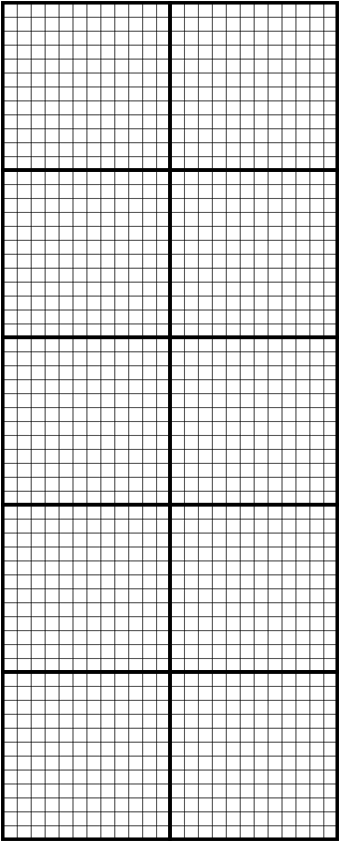


#### 素数分解法
 1. 算法设计
 - 找到p的质数
 - 找到q的质数
 - 找到p, q的共同质数，若分别出现$N_p$次和$N_q$次，则记该质数出现$min(N_p,N_q)$次
 - 计算共同质数及出现次数的乘积，得最大公约数
 - 例： gcd(18,84)
   先进行质因数分解 
   $$48 = 2^4*3$$ 
   $$180=2^2*3^2*5$$
   共同质数2出现2次，3出现1次。因此$$GCD(48,180)=2*2*3*1=12$$
   实践中，此法只在输入数字较小时可行。当输入数字较大，因对大数进行素因数分解耗费时间，此法变得不十分可行。
 2. 程序见gcd1

##### 素数分解法的Venn图解释
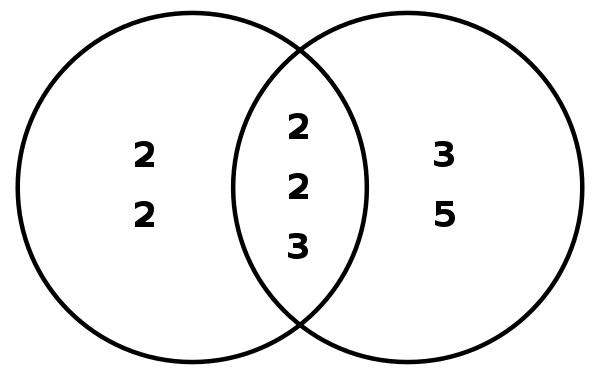

#### 改进蛮力法/逐次检查法
1. 算法设计
 - (1) 将min(p,q)赋值给t
 - (2) m除以t，如果余数为0，转(3),否则转（4）
 - (3) n除以t，如果余数为0，返回t，即为最大公约数，否则转(4)
 - (4) t减1，转（2）
 
 此法当输入有0时，失效。如$gcd(0, 8)$
 
2. 程序见gcd2
 
 
#### 殴几里德算法/辗转相除法
1. 建立模型
该模型的正确性，源于数学上对最大公约数性质的证明。我们这里不讨论该结论是否正确，直接接受该结论，认为这个公式是正确的。欧几里得算法设计即建立在这个公式基础上。

$$GCD(p, q) = gcd(q, p mod q)$$
这是个递归算法。相比素因数分解法，辗转相除法的效率更高。

2. 算法设计
 - (1) 如果q=0,返回p，p为最大公约数，否则，转（2）
 - (2) p除以q,将余数赋值给r
 - (3) q赋值给p, r赋值给q。转(1)
 
3. 程序见gcd3
4. [算法演示](https://algorithm-visualizer.org/simple-recursive/euclidean-greatest-common-divisor)

#### Stein算法/[Binary Euclidean algorithm](https://en.wikipedia.org/wiki/Binary_GCD_algorithm)

0. 缘起

更相减损法，也叫更相减损术，是出自《九章算术》的一种求最大公约数的算法。它原本是为约分而设计的，但适用于任何需要求最大公约数的场合。

《九章算术》是中国古代的数学专著，其中的“更相减损术”可以用来求两个数的最大公约数，即“可半者半之，不可半者，副置分母、子之数，以少减多，更相减损，求其等也。以等数约之。”

我们观察一下更相减损术的计算过程。例如，求GCD3(84,132)
 - p=84, q=132, q - p = 48
 - p=84, q=48, p - q = 36
 - p=36, q=48, q - p = 12
 - p=36, q=12, 更术用于手算非常得力，当两数变得很小时，人们已能肉眼观察出，谁是最大公约数了。比如此刻，我们已能看出，最大公约数是12了。为完整计，我们还是做完这个例子。
 - p=36, q=12, p - q = 24
 - p=24, q=12, p - q = 12
 - p=12, q=12, GCD为12
 
计算上，辗转相除法以除法为主，而更相减损术以减法为主。

1. 建立模型
Stein算法是根据类似观察，设计出的算法。其要旨在于检查输入两数的奇偶性（parity）。人们观察到GCD有如下性质。
- gcd(0, q) = q
- gcd(p, 0) = p
- gcd(2p,2q) = 2gcd(p, q)，这种情况是p,q均为偶数
- gcd(2p, q) = gcd(p, q), 如果q是奇数
- gcd(p, 2q) = gcd(p, q)，如果p是奇数
- gcd(p, q) = gcd(|p-q|, min(p,q))，如果p，q均为奇数。p-q，两奇数相减，得到偶数。可以继续运算。

2. 算法设计
 - 如果p=q，gcd(p, q)=p
 - 如果p, q均为偶数，$p=\frac{p}{2}, q=\frac{q}{2}$，以新p,q继续计算
 - 如果p偶，q奇，$p=\frac{p}{2}$
 - 如果p奇，q偶，$q=\frac{q}{2}$
 - 如果p, q均为奇数，p = |p - q|，即使用更相减损法。
 
 此法运算巧妙处在于，充分利用了计算机机内存储数的特质，即用二进制表示数，为判断奇偶、乘除法运算提供便利。
 
 - 判断奇偶可以与1做与运算
 
  计算机中的数字用二进制补码表示。通过某数的二进制形式，判断该数的奇偶性，可以仅看该二进制形式的最后一位。若最后一位是0的话，那么某数是偶数，是1的话是奇数。
  为什么？因为，若某二进制数除最后一位，其他位都是2的幂次方，其必然是偶数。若末位是0，自然是偶数，若末位是1，偶数+奇数=奇数。由此，人们可以通过一个数的二进制形式的最后一位为0或者1来判断该数的奇偶性质。怎么判断呢？用“与”运算。将某数二进制形式，和1，做“与”运算，其结果，即可判断奇偶性质。
  
  - 通过位移指令完成除法运算
  
  << 左移运算符
  
  例如：23<<2。将23转化为二进制，并以此向左移动2个bit，新增的低位补0
  
  binary：0001 0111
  
  位移后：0101 1100
  
  可以理解为：$a << b = a*2^b$（a乘以2的b次方）
 
 \>> 右移运算符

 例如：23>>2

 将23转换为二进制，并以此向右移动2个bit，如果为负数则在高位补1若为正数则在高位补0

 binary：0001 0111

 位移后：0000 0101

 可以理解为：$a>>b = a\%2^b$ (a除以2的b次方取整）
 
 Stein算法充分利用了计算机的特点，即用二进制表示数，为判断奇偶、乘法运算提供了便利。一般情况下，欧几里得算法足够用，当p,p涉及大素数，比如128位以上的素数时，Stein算法才有优势。
- 循环解法gcd4
- 递归解法gcd5

#### [不止这些，尚有更多解法](https://en.wikipedia.org/wiki/Greatest_common_divisor)

#### 动画演示算法辅助学习

 为了直观观察算法运行的过程和结果，人们借助动画，演示算法的运行过程。这几个网站可以做这件事。

 - [Algorithm visualizer](https://algorithm-visualizer.org/)
 - [Algorithm visualizer](https://github.com/algorithm-visualizer/algorithm-visualizer)
 - [Visual algorithm](visualgo.net)

### 从算法到程序到API
为了将算法用于实际，人们将算法编为程序。但程序，仅到实验阶段，还不足以达到实用程度。必须将程序封装为应用程序接口(API，Application Programming Interface)，才算实用的软件。

软件 = 充分**测试**的**程序** + **文档**

程序、测试、文档，这三件事若分别做，则开发需要协调，当然，软件公司会使用工作流程协调此事。好处是工作有分工，专业细分，缺点是协调有成本、有延迟。另外，维护成本也比较高，容易引发三者不一致。

为了能将程序、测试、文档，三件事集为一件事，人们提出了代码文档化[Code Documentation](https://textexpander.com/blog/code-documentation#:~:text=Code%20documentation%20is%20text%20that,supporting%20documentation%20about%20the%20code.)

>Code documentation is text that accompanies software code to explain what your code is doing, why it’s written the way it is, and/or how to use it. There are two main categories of documentation: documentation inside the code and supporting documentation about the code.

以python为例，写代码可用任意开发工具，写单元测试常用doctest或pytest，写文档使用[Sphinx Documentation](https://www.sphinx-doc.org/en/master/)。由此，三件事在一个程序文件内完成，测试代码、文档内容按特定格式写到注释里，使用辅助工具读源文件，自动完成单元测试和生成文档。

本课程的实验，推荐这个工作流程。当然其他语言有相应的工具套件，同学们可自行选用。

0. 注册github 
  - [git教程1](https://github.com/geeeeeeeeek/git-recipes)
  - [廖雪峰的git教程](https://www.liaoxuefeng.com/wiki/896043488029600)
1. 准备测试用例 testing and modifyiing
  - 软件测试四个阶段：单元测试、集成测试、系统测试和验收测试 
  - 单元测试，逻辑路径覆盖
  - 墨盒测试、白盒测试
  - 使用doctest/pytest测试（视频）
2. 写代码 designing  
3. 生成文档 documentation
  - 视频

In [7]:
# !python -m doctest -v src\000_gcd.py

### 本课程教学目标：提供针对问题的算法解决方案

0. 锻炼计算思维（用算法解问题）；针对问题，进行算法设计、分析、选择；设计并实现一个抽象数据类型，提供：代码+测试用例+文档。

1. 计算思维
 - 计算思维，Computational thinking ：[How to Think Like a Computer Scientist](http://openbookproject.net/thinkcs/python/english3e/index.html)
 - 阅读并理解别人的代码 Understand code ：Reading code is one of the best way to learn programming, beside writing code.
 - 理解计算的能与不能 Understand limits and abilities ：Something(not everything) can be computed。例如，计算机无法精确表示浮点数，1/3。

2. 解决问题方法 Map problem into computational solution。
 - 观察、提出问题
 - 分析问题、提出方案
 - 设计实验、实施方案
 - 分析结果及反馈

3. 算法解决问题的范式（套路）

[“范式（Paradigm）”是什么？](https://www.zhihu.com/question/21629921)

利用算法解决问题，主要是开发、发布一个抽象数据类型(ADT, Abstract Data Type)、类库、函数库。这是计算机专业解决问题的套路（之道）。

数据类型指的是一组值和一组对这些值进行操作的集合。对象（实例），即保存了某个数据类型的值的实体。抽象数据类型是一种能够对使用者隐藏数据表示的数据类型。在实现抽象数据类型时，我们的注意力几种在数据本身并将实现对该数据的各种操作。

人们使用应用程序接口来说明抽象数据类型的行为。API将列出所有构造函数和实例方法并简要描述它们的功用。所有对象都有三大重要特性：状态、标识和行为。构建现代软件最重要也是最有挑战的一项任务就是设计API。

这个ADT，从外看（使用者角度），是一组API，提供了调用接口，解决了问题，并且进行了信息隐藏，即隐藏了实现细节。使用者只要调用API中的类或函数即可完成任务，无需注意内部实现细节。从内看（开发者角度），是具体实现，包含代码（实现算法、完成工作），测试用例（保证正确性质），文档（对参数、实现的说明，表达了开发者意图，为什么这么做，怎么做的）。

ADT主要包含两个组成部分：数据结构（类、对象、实例、变量、常量）、算法实现。或属性和方法。

解决方案就要设计、实现、发布一个ADT，这个ADT的性质要能解决面对的问题。而为实现这个性质，需要属性与方法配合，合力完成任务。因此，ADP的设计就很讲究，选用什么样的数据结构，什么样的方法，不能多，不能少。通过选择数据结构、算法，再组合、安插、排布它们，进而解决问题。这种排布没有必须只用一种或几种算法思想。只要用哪种算法思想，抓住纲（算法核心思路），优化方案，解决问题即可。

属性会使用某种数据结构，它一定是**集合**。常用数组、链表、双向链表、或高级数据结构，如栈、队列、双向队列、优先队列、堆、树等。这些高级数据结构本身也是ADT，它们也是构筑于基本数据结构之上。当然，定义后，这些高级数据结构完全可以充任属性，看上去像基本数据结构一样。类还可以可作为类的属性。这是类和类之间的关联、组成、组合关系。

方法与属性关系密切。

4. 数据结构与算法是计算机行当区别与其他行当本质所在。


5. **解决方案包括：代码、测试用例、文档，即提供一个完整可用的API**

完整指包含测试用例和文档，可用指他人可以调用API中的类或函数。

### 什么是算法？

#### 算法术语探源

算法algorithm，这一术语是对al-Khowarizmi(奥尔科瓦里兹米，或花剌子密)这一名字的讹用。他是9世纪的一位阿拉伯数学家。他关于印度数字的一本书是现代十进制符号的基础。

花剌子密(Abu Ja'far Mohammed ibn Musa al-Khowarizmi,780-850)天文学家和数学家，是巴格达“智慧之家”成员。他名字的含义是“来自花剌子模”，现称卡瓦Khiva，是乌兹别克斯坦的一部分。花剌子密写过关于数学、天文学和几何学的书，西欧人首先从他的著作中学习代数。代数(algebra)一词源自al-jabr。

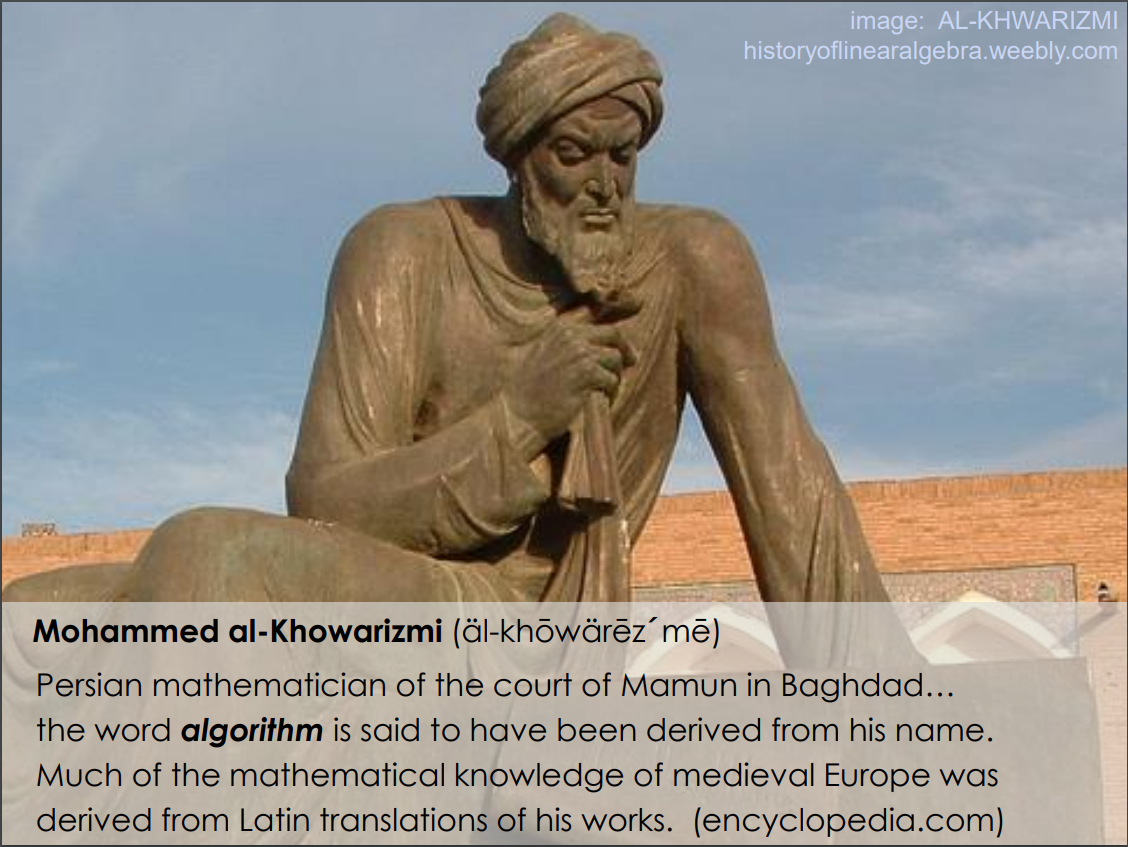

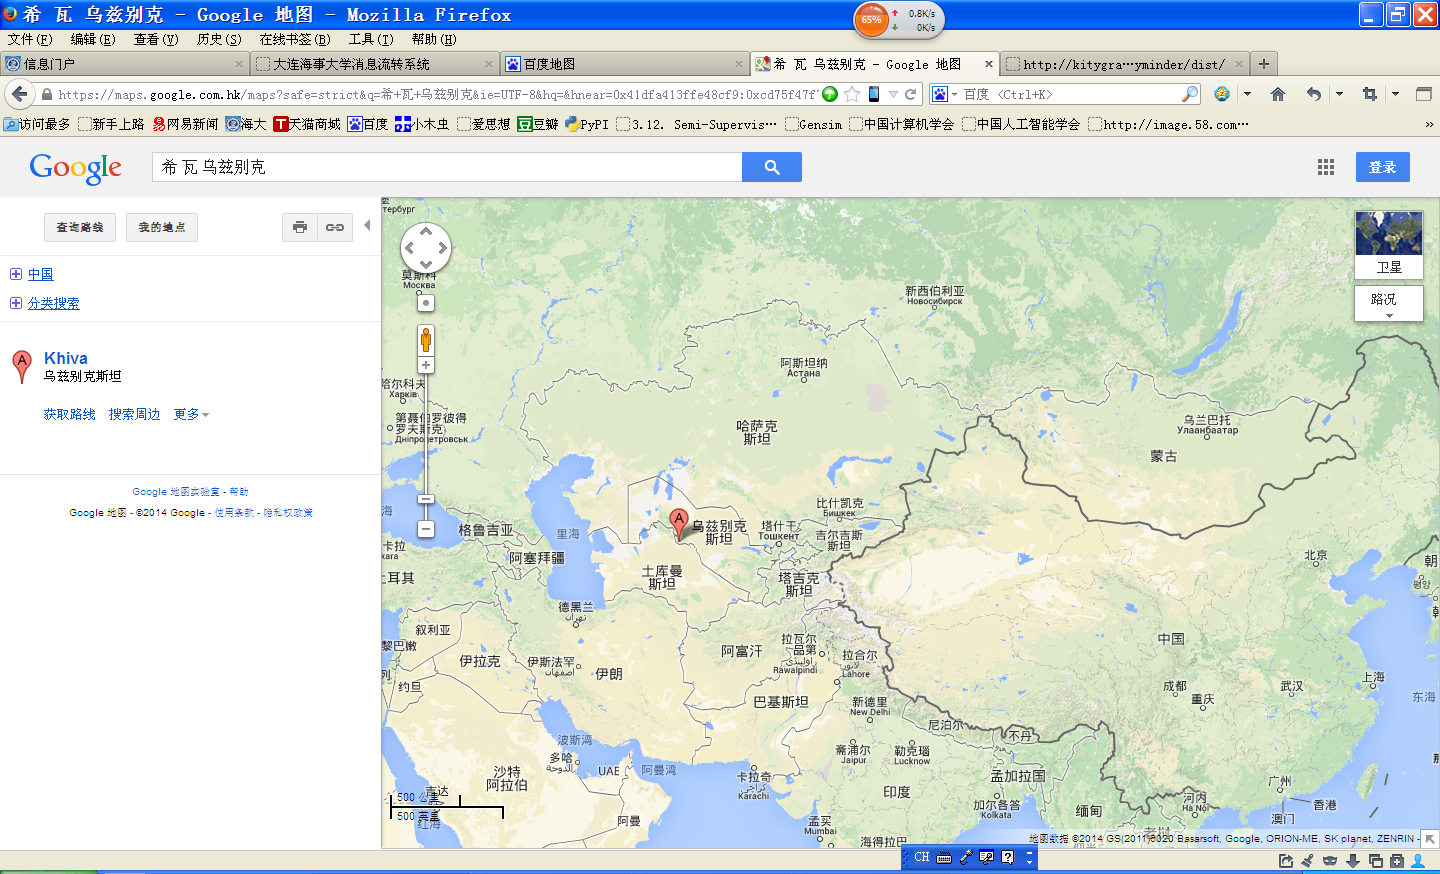

“al-jabr”是用以解决一元二次方程的两个办法之一。算法（Algorism、Algorithm）出自“Algoritmi”，这是花剌子密(al-Khwārizmī)的拉丁文译名。欧洲作者使用了他的名字的一个拉丁讹音来表示用印度数字做算术运算，后来演变成algorithm一词。

> (Rosen,2002). K.H. Rosen.离散数学及其应用（原书第4版）,2002 

> (Knuth,1968). Donald E. Knuth. The Art of Computer Programming.Addison-Wesley,1968

所以……在发明计算机之前就有算法。在发明计算机之后，就有了更多的算法。算法是计算机计算的核心。

> 扩展内容：黑暗中世纪、阿拉伯人、希腊-罗马文明、文艺复兴及其他。

#### 那什么是算法呢？

人们一般通过下定义来认识事物，那算法的定义是什么呢？



算法是指解决问题的一种方法或一个过程。
算法是若干指令的有穷序列。
> 计算机算法设计与分析(第4版)，王晓东 电子工业出版社，2012.7

算法就是能解决问题的指令序列，即能在有限时间内从合法输入数据得到正确输出结果。
算法不会告知答案，却会提供求得答案的具体指令和步骤。
> 算法分析与设计基础， Anany Levitin

算法是进行一项计算或解一道题的准确指令的有限集。
> 离散数学及其应用（第四版），Kenneth H. Rosen

一般而言，算法是精确定义的计算过程，它接受输入，产生输出。因此，算法就是把输入转换成输出的计算步骤。
我们还可以把算法看成求解计算问题的工具。

> 算法导论,Thomas H. Cormen

An algorithm is a sequence of computational steps that transform the input into output.
> (Knuth,1968)

在计算机科学领域，用算法这个词来描述一种有限、确定、有效的并适合用计算机程序来实现的解决问题的方法。是这种方法，而非计算机程序本身描述了解决问题的步骤。算法是计算机科学的基础，是这个领域研究的核心。算法是计算机学科中最具有方法论性质的核心概念，也被誉为计算机学科的灵魂。

#### 分类知识

除定义外，我们从另一个角度，知识类别的角度来试着理解一下。我们一直在学知识，不出意外，还会继续学知识，直到不学的那一天。

1. 知识类别
 - 事实性知识 Declarative/Descriptive knowledge
 - 过程性知识 Procedural/Imperative knowledge
2. 陈述式知识:事实。
 - 饭店的菜肴介绍，配料成分、色香味、照片
 - 算术，包括数字:自然数、有理数等；算符:加减乘除
3. 程序式知识: 完成某件工作的一系列操作步骤的描述，这些描述用一系列步骤刻画计算过程
 - 菜肴的烹制方法和过程，各种相关操作及其执行顺序，西红柿炒蛋
 - 四则运算法则，先乘除后加减

计算机做计算，就是刻画程序式知识。 例如：欧几里德算法又称辗转相除法，用于计算两个整数m, n的最大公约数。其计算原理依定理：gcd(m, n) = gcd(n, m mod n)。这个定理的意思是：整数m、n的最大公约数等于n和m除以n的余数的最大公约数。

例： 有两个整数：120和45，我们按照上面的方法求他们的最大公约数。

gcd(120, 45) = gcd(45, 120 mod 45) = gcd(45, 30)
gcd(45, 30) = gcd(30, 45 mod 30) = gcd(30, 15)
gcd(30, 15) = gcd(15, 30 mod 15) = gcd(15, 0) = 15
当 m mod n 等于零时，即求15和0的最大公约数时，这个循环应该终止，15就是120和45的最大公约数。

算法强调计算过程，强调结果的类别，而非个别计算结果。

编程:将程序式知识，通过计算机程序设计语言表示出来，存储在文件中，执行。程序**固化了程序性知识。**。可以理解为固化了算法。

4. 如何编程序

编程： 告诉计算机做什么。程序用某种计算机能理解的语言编写算法，输入计算机，计算机编译或解释执行语言，实现功能。[编程到底难在哪里？](https://www.zhihu.com/question/22508677/answer/141334678)

算法： 类似菜谱、说明手册，详细说明做事步骤。

例如： 西红柿炒蛋

`
  放入鸡蛋翻炒
  放入西红柿
　如果　没熟：
　　　　继续翻炒
　　　　直至熟了，不再翻炒
  加盐调味
  如果　不入味：
　　　　继续加盐
　　　　直至口感合适
  出锅盛盘
`

该算法包含原料，如鸡蛋、西红柿、盐，代表被操作的数据，及程序指令，如放入、翻炒、加盐、出锅，代表操作动作。再如欧几里得法，与炒鸡蛋类似，是程序性知识。

版权允许情况下，算法、程序可自由修改、发布、分享。在自由软件（Free software）、开源（Open source）、社会化编程（Social programming）影响下，获得、学习、改进开源程序成为风尚。

Algorithm is the cornerstone of computer science
TODO：Knuth的形式化定义

### 算法的性质

算法表示中要满足以下的性质：
1. 目的性 

算法有明确的目的，能完成赋予它的功能。

2. 分步性 

算法为完成其复杂的功能，由一系列计算机可执行的步骤组成。

3. 有序性 

算法的步骤是有序的，不可随意改变算法步骤的执行顺序。

4. 有限性 

算法是有限的指令序列，所包含步骤也是有限的。

5. 操作性 

算法是有限的指令序列，算法所包含的步骤是有限的。 

也有其他说法，如：

1. 输入

有些输入量需要在算法执行过程中输入，而有的算法表面上可以没有输入，实际上已被嵌入算法之中。

2. 输出

它是一组与输入有确定关系的量值，是算法进行信息加工后得到的结果。

3. 有限/有穷性

一个算法在执行有穷步之后必须结束。也就是说一个算法它所包含的计算步骤是有限的而且每个步骤都能在有限时间内完成。

4. 有效/确定性

对于每种情况下所应执行的操作，在算法中都有确切的规定，使算法的执行者或阅读者都能明确其含义及如何执行。并且在任何条件下，算法都只有一条执行路径。

5. 可行性

算法中描述的操作都可以通过已经实现的基本操作运算有限次实现。

### 开发算法的过程

1. 陈述问题
2. 蛮力法 When in doubt use brute force
3. 证明正确（保持某种性质）
4. 分析性能（分析算法：观察、倍率实验、提出假设、验证假设、运行时间/时间复杂度、占用空间/空间复杂度）
5. 优化改进
6. 比较算法
7. 选用算法，开发API
8. 发布

### 扩展内容

⒈农夫带着狼、羊、一篮菜过河。

约束：都要过河；船只能容纳农夫和另一件物品；若农夫不在，则狼会吃羊，羊会吃菜。

要求：为农夫求解过河方案或证明此问题无解。

⒉四人过独木桥。

约束：	都在同一侧；最多可两人一起过桥；现在是夜间，只有一个手电筒，无论单独或结伴，必须使用手电筒才能过桥；不能抛手电筒，只能由人携带。

甲过桥1分钟，乙用时2分钟，丙5分钟，丁10分钟。两人过桥，则用较慢人的时间。

要求：17分钟内都到另一侧去。求解。

## 第二讲
算法思想是具体方法的纲
循环
循环不变量invariant
排序，
### 循环不变量 [Loop invariant](https://en.wikipedia.org/wiki/Loop_invariant#:~:text=In%20computer%20science%2C%20a%20loop,the%20effect%20of%20a%20loop.)
In computer science, a **loop invariant** is a property of a program loop that is TRUE before (and  after) each iteration. It is a logical assertion, sometimes checked within the code by an asssertion call.  Knowing its invariant(s) is essential in understanding the effect of a loop. 

The loop invariants will be true on entry into a loop and following each iteration, so that on exit from the loop both the loop invariants and the loop termination condition can be guaranteed.

在计算机科学中，循环不变式（loop invariant，或循环不变量、循环不变条件，也有译作循环不变性），是一组在循环体内、每次迭代均保持为真的性质（表达式），通常被用来证明程式或伪码的正确性（有时但较少情况下用以证明算法的**正确性**）。简单说来，“循环不变式”是指在循环开始和循环中，每一次迭代时为真的性质。这意味着，一个正确的循环体，在循环结束时“循环不变式”和“循环终止条件”必须同时成立。

A good loop invariant should satisfy three properties:

- Initialization: The loop invariant must be true before the first execution of the loop.
- Maintenance: If the invariant is true before an iteration of the loop, it should be true also after the iteration.
- Termination: When the loop is terminated the invariant should tell us something useful, something that helps us understand the algorithm.

`
// the Loop Invariant must be TURE here : Initialization
   while ( TEST CONDITION ) {
      // top of the loop
      ...
      // bottom of the loop
      // the Loop Invariant must be TURE here : Maintenance
   }
   // Termination + Loop Invariant = Goal : Termination   
`

The point of Loop invariants is the promise that the invariant will be restored before repeating the loop body each time.

Why is this useful? If you identify an important invariant, it's easy to check it holds even when you modify some code.  You could just add an assert statement of some sort.

More specifically, these invariants help us reason about how loops behave.

The basic idea is that we want a systematic way to proe properties of code.

循环不变量，是归纳法。n = 1, 2, 3……均成立。
### 参考阅读
- 关于循环不变量的综述文章：C. A. Furia, B. Meyer和S. Velder, Loop invariants: Analysis, classification, and examples, ACM Comput. Surv., 卷 46, 期 3, 页 1–51, 1月 2014, doi: 10.1145/2506375.
- [如何正确的理解循环不变式?](https://www.zhihu.com/question/26700198)
- [理解循环不变量](https://segmentfault.com/a/1190000041715631)
- [Loop Invariants in Python](https://softwareengineering.stackexchange.com/questions/183815/loop-invariants-in-python)
- [What is a loop invariant?](https://stackoverflow.com/questions/3221577/what-is-a-loop-invariant)
- [Loop Invariants](https://www.cs.miami.edu/home/burt/learning/Math120.1/Notes/LoopInvar.html)
- [Loop Invariants](https://www.cs.scranton.edu/~mccloske/courses/cmps144/invariants_lec.html)
- [Loops Invariants, Correctness, and Program Derivation](https://archives.evergreen.edu/webpages/curricular/2001-2002/dsa01/loops.html)
- [*Loop Invariant Proofs: General Strategies for finding loop invariants*](https://www.win.tue.nl/~kbuchin/teaching/JBP030/notebooks/loop-invariants.html)
- [Loop invariants can give you coding superpowers](https://yourbasic.org/algorithms/loop-invariants-explained/)

例子：
gcd
insert sort
three way partition

In [13]:
# exponentiation by squaring
def exp_by_squaring(m:int, n:int)->int:
    if n < 0:
        return exp_by_squaring(1/m, -n)
    elif n == 0:
        return 1
    elif ((n%2) == 0):  # even
        return exp_by_squaring(m*m, n/2)
    elif ((n%2) != 0): # odd
        return m * exp_by_squaring(m*m, (n-1)/2)
    


# print(exp_by_squaring(3, 13))

def exp2(m:int, n:int)->int: 
    if n == 0: 
        return 1
    res = exp2(m, n//2)
    if (n%2): # odd
        return res * res * m
    else: # even
        return res * res
print(exp2(9, 4))
    
    
def exp3(m:int, n:int)->int:
    res = 1
    while(n>0):
        if (n&1):  # 1 bit, last digit
            res = res * m
        m = m * m # square of previous value
        n >>= 1 # drop off the last digit
    return res
    
print(exp3(9, 4))
print("hello") 

6561
6561
hello


[解释](https://cp-algorithms.com/algebra/binary-exp.html#algorithm)
这个算法有个[应用](http://academickids.com/encyclopedia/index.php/Exponentiation_by_squaring)，计算大数的幂的模，尤其在加密解密中有用。
例如：
$$13789^{722341}(mod 2345)$$

In [ ]:
### 算法分析

大$O$

## 第三讲
递归
base case
recursive case
Hanoi tower
Ackmann func
排序

## 第四讲 贪婪法
性质、策略

## 第五讲 动态规划
最优子结构？


## 第六讲 图
回溯
分支限界

## 第七讲 查找

## 第八讲 树

## 第九讲 图

## 第十讲 前沿 机器学习算法 
KNN
DECISION TREE
神经网络
paper folding？